In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'


In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
p_l = 1.0/21.0
p_f = 1- p_l
prior = torch.distributions.Categorical(probs=torch.tensor([p_l, p_f]))
prior

Categorical(probs: torch.Size([2]))

Text(0.5, 1.0, 'Prior')

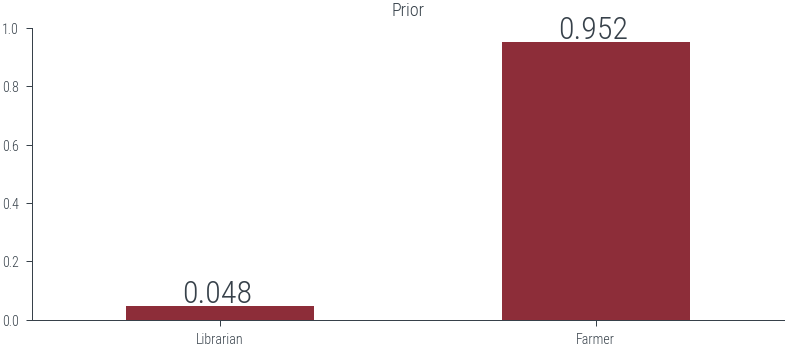

In [4]:
pd.Series(index=["Librarian", "Farmer"], data=prior.probs).plot(kind='bar', rot=0)
# Write the values on top of the bar
for i, v in enumerate(prior.probs):
    plt.text(i - 0.1, v + 0.01, f"{v.item():0.3f}")
plt.title("Prior")

In [5]:
# Get 210 samples from prior given a seed

torch.manual_seed(3)
samples = prior.sample(torch.Size([210, ]))
print(samples)
print(samples.sum())

tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor(199)


In [43]:
p_d_l = torch.tensor(0.4)
p_d_f = torch.tensor(0.1)

In [44]:
p_l_d = (p_d_l * p_l) / (p_d_l * p_l + p_d_f * p_f)
p_l_d

tensor(0.1667)

In [46]:
p_d_l *p_l

tensor(0.0190)

In [48]:
p_d_f*p_f

tensor(0.0952)

In [2]:
## Electricity consumption

In [3]:
prior_theta_0 = torch.distributions.Uniform(80, 100)
prior_theta_1 = torch.distributions.Uniform(1, 2)

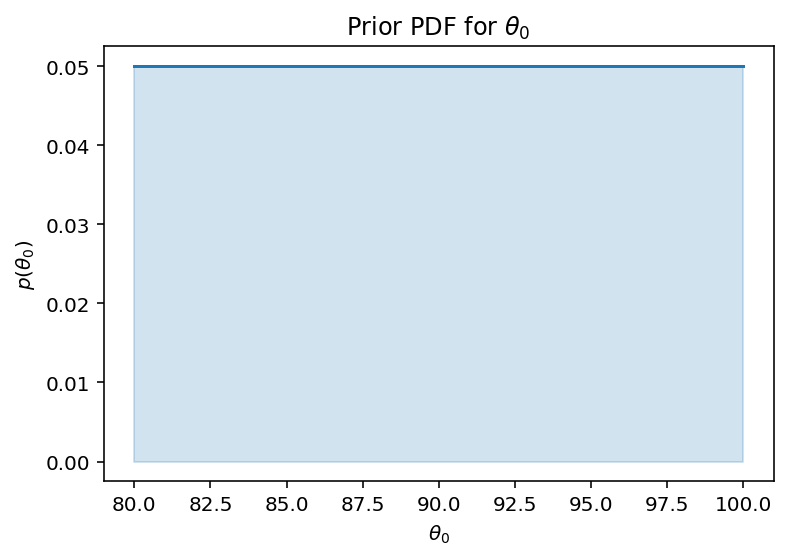

In [4]:
# Plottting PDFs

eps = 1e-3
theta_0_lin = torch.linspace(80+eps, 100.0-eps, 100)
plt.plot(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$p(\theta_0)$')
plt.title(r'Prior PDF for $\theta_0$')
# Fill between 
plt.fill_between(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)), color='C0', alpha=0.2)

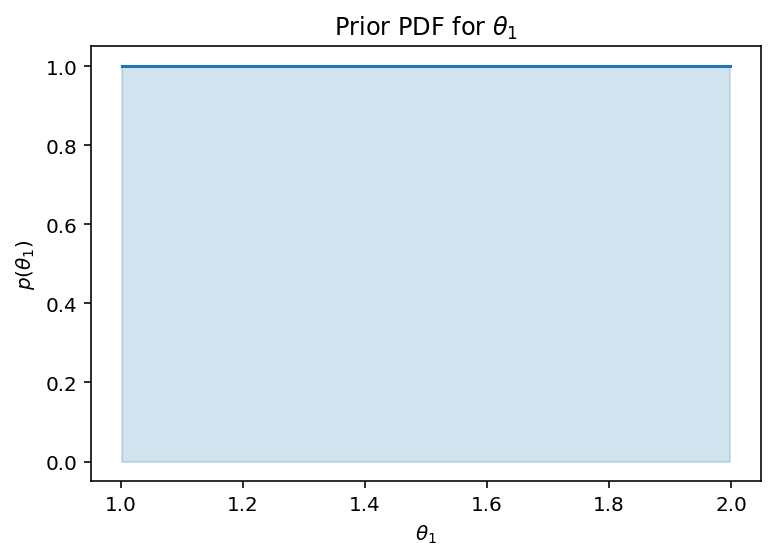

In [5]:
theta_1_lin = torch.linspace(1+eps, 2.0-eps, 100)
plt.plot(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)))
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$p(\theta_1)$')
plt.title(r'Prior PDF for $\theta_1$')
# Fill between 
plt.fill_between(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)), color='C0', alpha=0.2)

In [9]:
# plotting samples from prior

n_samples = 1000
theta_0s = prior_theta_0.sample(torch.Size([n_samples,]))
theta_1s = prior_theta_1.sample(torch.Size([n_samples,]))

Text(0.5, 1.0, '$\\theta_0$')

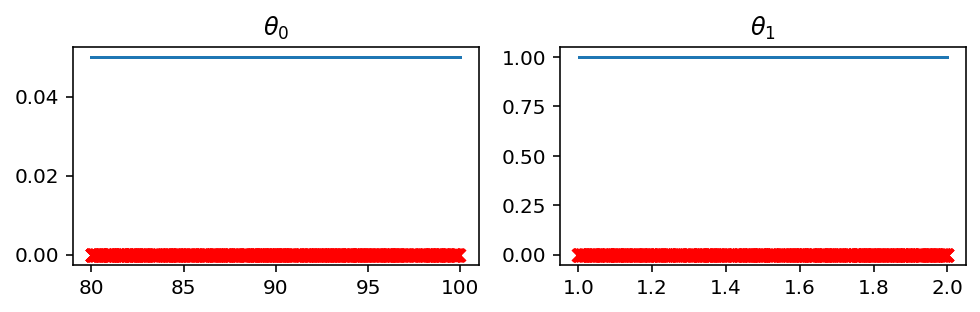

In [10]:
# Plot the samples
fig, ax = plt.subplots(figsize=(8, 2), ncols=2)
ax[0].plot(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)), label='prior')

# plot theta_0 samples
ax[0].scatter(theta_0s, torch.zeros_like(theta_0s),  label='samples',c='r', marker='x')

ax[1].plot(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)), label='prior')
ax[1].scatter(theta_1s, torch.zeros_like(theta_1s), label='samples',c='r', marker='x')

ax[1].set_title(r'$\theta_1$')
ax[0].set_title(r'$\theta_0$')

87.69513702392578 1.0412778854370117
95.6269760131836 1.1212730407714844
86.8476333618164 1.2125056982040405
90.94928741455078 1.1671473979949951
96.58927154541016 1.3385244607925415
87.47602844238281 1.558532476425171
88.01754760742188 1.1025707721710205
90.33709716796875 1.9295198917388916
88.80725860595703 1.9910452365875244
98.52078247070312 1.986382007598877
84.97046661376953 1.1545259952545166
89.32050323486328 1.5447709560394287
96.62725067138672 1.250910997390747
81.65365600585938 1.5428019762039185
89.25396728515625 1.5592520236968994
85.2579574584961 1.0442684888839722
94.31983947753906 1.6553218364715576
89.50067138671875 1.9270992279052734
95.697998046875 1.299673318862915
98.55661010742188 1.488832950592041
85.66251373291016 1.7670807838439941
84.5622787475586 1.9460041522979736
89.70915222167969 1.7484333515167236
83.01439666748047 1.6918725967407227
94.00970458984375 1.6238453388214111
80.7804946899414 1.3233580589294434
91.94137573242188 1.953773021697998
97.56145477294

Text(0, 0.5, 'Electricity Consumption')

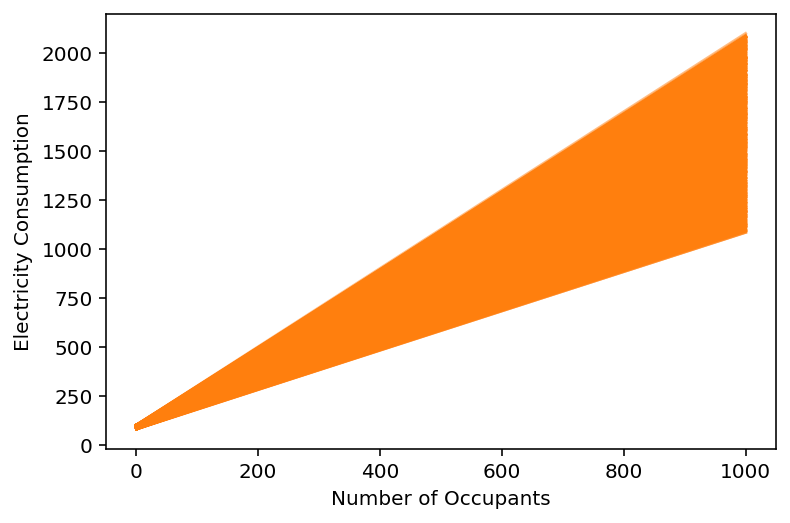

In [11]:
# Generating draws from prior

xs = torch.linspace(1, 1000, 100)
def forward(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

preds = []

for theta_0, theta_1 in zip(theta_0s, theta_1s):
    print(theta_0.item(), theta_1.item())
    preds.append(forward(xs, theta_0, theta_1))
    plt.plot(xs, preds[-1], color='C1', alpha=0.5)

plt.xlabel('Number of Occupants')
plt.ylabel('Electricity Consumption')

In [12]:
torch.distributions.Uniform(0, 1).support

Interval(lower_bound=0.0, upper_bound=1.0)

In [14]:
torch.distributions.LogNormal(0, 1).support

GreaterThan(lower_bound=0.0)

In [84]:
forward(xs, theta_0, theta_1)

tensor([83.7934])

In [110]:
torch.stack(preds).max(axis=0).values

tensor([ 100.2101,  118.9044,  137.5986,  156.2929,  175.8384,  195.5405,
         215.2426,  234.9448,  254.6469,  274.3490,  294.0511,  313.7533,
         333.4554,  353.1575,  372.8596,  392.5617,  412.2639,  431.9660,
         451.6681,  471.3702,  491.0724,  510.7745,  530.4766,  550.1788,
         569.8809,  589.5830,  609.2852,  628.9872,  648.6894,  668.3915,
         688.0936,  707.7958,  727.4979,  747.2000,  766.9022,  786.6043,
         806.3064,  826.0085,  845.7106,  865.4127,  885.1149,  904.8170,
         924.5192,  944.2213,  963.9234,  983.6255, 1003.3276, 1023.0298,
        1042.7319, 1062.4340, 1082.1361, 1101.8383, 1121.5404, 1141.2424,
        1160.9446, 1180.6467, 1200.3489, 1220.0510, 1239.7531, 1259.4552,
        1279.1573, 1298.8595, 1318.5615, 1338.2638, 1357.9658, 1377.6680,
        1397.3701, 1417.0723, 1436.7743, 1456.4764, 1476.1786, 1495.8806,
        1515.5829, 1535.2849, 1554.9871, 1574.6892, 1594.3914, 1614.0935,
        1633.7955, 1653.4977, 1673.199